<a href="https://colab.research.google.com/github/seunghee0518/AI_python/blob/main/FCN(Fully_Connected_Network)_MNIST_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%ED%86%B5%EA%B3%84%EC%A0%81%EC%9D%B4%ED%95%B4_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터를 이용해 손글씨를 식별하는 은닉층 1개의 완전연결신경망

In [2]:
#import library
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.6.0


11501568/11490434 [==============================] - 0s 0us/step


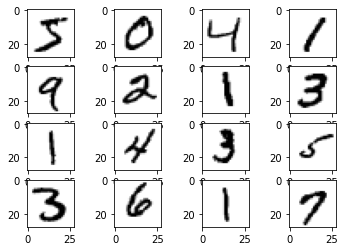

In [3]:
# MNIST데이터셋 불러오기 & 데이터셋 확인
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

import matplotlib.pyplot as plt
for col1 in range(16) : 
  plt.subplot(4, 4, col1+1)
  plt.imshow(train_x[col1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [4]:
#MNIST 이미지 데이터 구조 확인
digit = train_x[0]
print("digit : ", digit.shape)
print("train images : ", train_x.shape)
print("test images : ", test_x.shape)

digit :  (28, 28)
train images :  (60000, 28, 28)
test images :  (10000, 28, 28)


# 은닉층1개

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


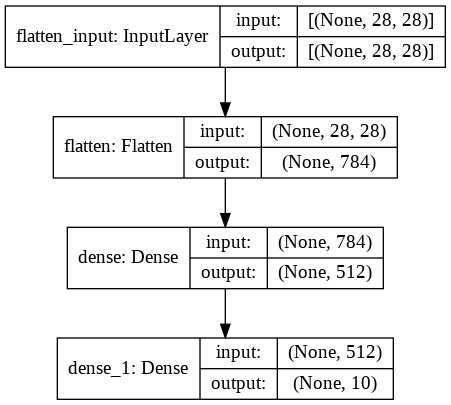

In [5]:
#MNIST 이미지 식별하는 완전신경망(은닉층 1개)
#신경망 작성
model1_1 = models.Sequential([
                              Flatten(input_shape = (28, 28)),
                              Dense(512, activation= 'relu'),
                              Dense(10, activation= 'softmax') # 분류할 개수 10개(0~9까지 숫자)
                              ])

#신경망 요약
model1_1.summary()
plot_model(model1_1, to_file= " model1_1_mnist.png", show_shapes= True)

In [6]:
#신경망 학습
model1_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist1_1 = model1_1.fit(train_x, train_y, epochs = 12, batch_size = 256, validation_split = 0.25)

Epoch 1/12
176/176 [==============================] - 4s 7ms/step - loss: 0.3770 - accuracy: 0.8962 - val_loss: 0.2026 - val_accuracy: 0.9439
Epoch 2/12
176/176 [==============================] - 1s 4ms/step - loss: 0.1597 - accuracy: 0.9552 - val_loss: 0.1436 - val_accuracy: 0.9583
Epoch 3/12
176/176 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.9694 - val_loss: 0.1196 - val_accuracy: 0.9646
Epoch 4/12
176/176 [==============================] - 1s 4ms/step - loss: 0.0811 - accuracy: 0.9770 - val_loss: 0.1097 - val_accuracy: 0.9680
Epoch 5/12
176/176 [==============================] - 1s 4ms/step - loss: 0.0622 - accuracy: 0.9827 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 6/12
176/176 [==============================] - 1s 4ms/step - loss: 0.0482 - accuracy: 0.9868 - val_loss: 0.0932 - val_accuracy: 0.9730
Epoch 7/12
176/176 [==============================] - 1s 4ms/step - loss: 0.0372 - accuracy: 0.9903 - val_loss: 0.0878 - val_accuracy: 0.9733
Epoch 

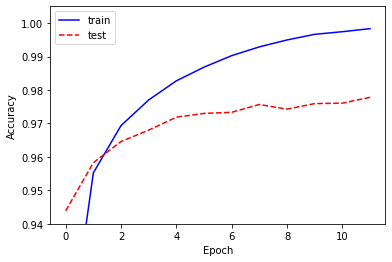

313/313 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9812
train accuracy :  0.9937999844551086 train loss :  0.02729642763733864
test accuracy :  0.9811999797821045  test loss :  0.06480918824672699


In [7]:
#학습 그래프 
plt.plot(hist1_1.history['accuracy'], 'b-')
plt.plot(hist1_1.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train1_1 = model1_1.evaluate(train_x, train_y)
sc_test1_1 = model1_1.evaluate(test_x, test_y)
print("train accuracy : ", sc_train1_1[1], "train loss : ", sc_train1_1[0])
print("test accuracy : ", sc_test1_1[1], " test loss : ", sc_test1_1[0])

위 결과를 보면 은닉층이 1개 일 때 훈련데이터의 정확도는 99.3%, 시험 데이터의 정확도는 98% 정도로 시험데이터의 정확도가 더 낮다는 것을 알 수 있다.
따라서 시험데이터의 정확도 더 늘리기 위해 은닉층을 2개로 늘려보았다.

# 은닉층2개
* model2_1 뉴런 수 : 512 / 512
* model2_2 뉴런 수 : 512 / 256

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


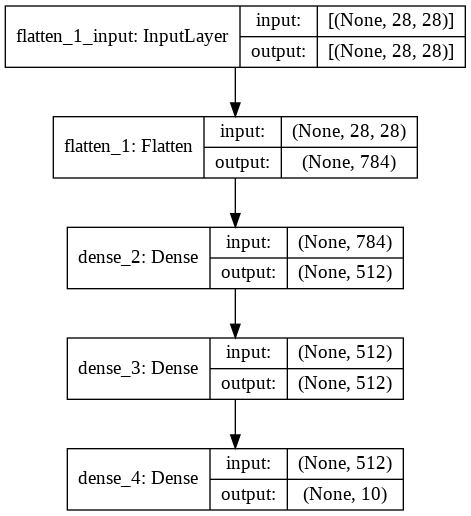

In [8]:
#MNIST 이미지 식별하는 완전신경망(은닉층 2개(은닉층 뉴런512개))
#신경망 작성
model2_1 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation = 'relu'),
                            Dense(512, activation = 'relu'),
                            Dense(10, activation= 'softmax')
                            ])

#신경망 요약
model2_1.summary()
plot_model(model2_1, to_file= " model2_1_mnist.png", show_shapes= True)

Epoch 1/12
176/176 [==============================] - 2s 7ms/step - loss: 0.3064 - accuracy: 0.9124 - val_loss: 0.1435 - val_accuracy: 0.9595
Epoch 2/12
176/176 [==============================] - 1s 5ms/step - loss: 0.1066 - accuracy: 0.9688 - val_loss: 0.1159 - val_accuracy: 0.9657
Epoch 3/12
176/176 [==============================] - 1s 6ms/step - loss: 0.0655 - accuracy: 0.9809 - val_loss: 0.1005 - val_accuracy: 0.9695
Epoch 4/12
176/176 [==============================] - 1s 6ms/step - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.0994 - val_accuracy: 0.9719
Epoch 5/12
176/176 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.0897 - val_accuracy: 0.9736
Epoch 6/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0907 - val_accuracy: 0.9754
Epoch 7/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0146 - accuracy: 0.9959 - val_loss: 0.0909 - val_accuracy: 0.9771
Epoch 

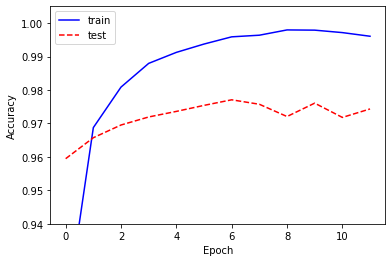

313/313 [==============================] - 1s 3ms/step - loss: 0.0843 - accuracy: 0.9801
train accuracy :  0.9912999868392944  train loss :  0.034651078283786774
test accuracy :  0.9800999760627747  test loss :  0.08432424813508987


In [9]:
#은닉층2개 신경망 학습
model2_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist2_1 = model2_1.fit(train_x, train_y, epochs = 12, batch_size = 256, validation_split = 0.25)

#학습 그래프 
plt.plot(hist2_1.history['accuracy'], 'b-')
plt.plot(hist2_1.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_1 = model2_1.evaluate(train_x, train_y)
sc_test2_1 = model2_1.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_1[1], " train loss : ", sc_train2_1[0])
print("test accuracy : ", sc_test2_1[1], " test loss : ", sc_test2_1[0])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


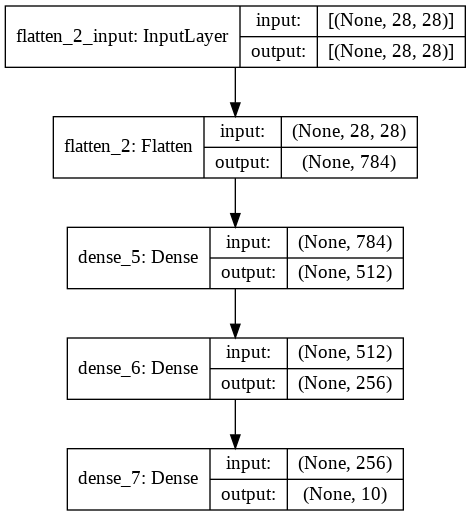

In [10]:
#MNIST 이미지 식별하는 완전신경망(은닉층 2개(은닉층 뉴런512개, 256개))
#신경망 작성
model2_2 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation = 'relu'),
                            Dense(256, activation = 'relu'),
                            Dense(10, activation= 'softmax')
                            ])

#신경망 요약
model2_2.summary()
plot_model(model2_2, to_file= " model2_2_mnist.png", show_shapes= True)

Epoch 1/12
176/176 [==============================] - 1s 6ms/step - loss: 0.3192 - accuracy: 0.9081 - val_loss: 0.1505 - val_accuracy: 0.9551
Epoch 2/12
176/176 [==============================] - 1s 5ms/step - loss: 0.1108 - accuracy: 0.9668 - val_loss: 0.1125 - val_accuracy: 0.9667
Epoch 3/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0719 - accuracy: 0.9787 - val_loss: 0.0969 - val_accuracy: 0.9717
Epoch 4/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0948 - val_accuracy: 0.9715
Epoch 5/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0849 - val_accuracy: 0.9755
Epoch 6/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.0889 - val_accuracy: 0.9747
Epoch 7/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0148 - accuracy: 0.9962 - val_loss: 0.0855 - val_accuracy: 0.9771
Epoch 

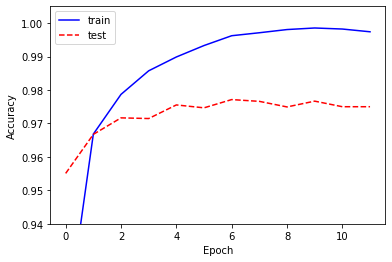

313/313 [==============================] - 1s 3ms/step - loss: 0.0930 - accuracy: 0.9754
train accuracy :  0.9915000200271606  train loss :  0.03434007987380028
test accuracy :  0.9753999710083008  test loss :  0.09303631633520126


In [11]:
#은닉층2개 신경망 학습
model2_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist2_2 = model2_2.fit(train_x, train_y, epochs = 12, batch_size = 256, validation_split = 0.25)

#학습 그래프 
plt.plot(hist2_2.history['accuracy'], 'b-')
plt.plot(hist2_2.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_2 = model2_2.evaluate(train_x, train_y)
sc_test2_2 = model2_2.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_2[1], " train loss : ", sc_train2_2[0])
print("test accuracy : ", sc_test2_2[1], " test loss : ", sc_test2_2[0])

In [12]:
print("=========== [은닉층 1개] ===========")
print("train accuracy : ", sc_train1_1[1], "train loss : ", sc_train1_1[0])
print("test accuracy : ", sc_test1_1[1], " test loss : ", sc_test1_1[0])
print("/n")

print("=========== [은닉층 2개] ===========")
print("=========== hidden = 512 / 512 ===========")
print("train accuracy : ", sc_train2_1[1], "train loss : ", sc_train2_1[0])
print("test accuracy : ", sc_test2_1[1], " test loss : ", sc_test2_1[0])
print("/n")

print("=========== hidden = 512 / 256 ===========")
print("train accuracy : ", sc_train2_2[1], "train loss : ", sc_train2_2[0])
print("test accuracy : ", sc_test2_2[1], " test loss : ", sc_test2_2[0])


=========== [은닉층 1개] ===========
train accuracy :  0.9937999844551086 train loss :  0.02729642763733864
test accuracy :  0.9811999797821045  test loss :  0.06480918824672699
/n
=========== [은닉층 2개] ===========
=========== hidden = 512 / 512 ===========
train accuracy :  0.9912999868392944 train loss :  0.034651078283786774
test accuracy :  0.9800999760627747  test loss :  0.08432424813508987
/n
=========== hidden = 512 / 256 ===========
train accuracy :  0.9915000200271606 train loss :  0.03434007987380028
test accuracy :  0.9753999710083008  test loss :  0.09303631633520126


은닉층을 2개 & 은닉층별 뉴런의 수가 512/256일 때 훈련데이터의 정확도는 99.4%, 시험데이터는 98.01%로 은닉층이 1개 였을 때보다 약간 증가 했지만 시험데이터의 정확도 차이가 미비한 것을 볼 수 있다.
따라서 은닉층이 1개일 경우와 은닉층이 2개(뉴런의 수 512/256)의 epochs 수를 늘려 보았다.

# 은닉층 1개 & epochs = 120 / 500 / 1000

Epoch 1/120
176/176 [==============================] - 1s 5ms/step - loss: 0.3639 - accuracy: 0.9002 - val_loss: 0.1997 - val_accuracy: 0.9431
Epoch 2/120
176/176 [==============================] - 1s 4ms/step - loss: 0.1561 - accuracy: 0.9561 - val_loss: 0.1398 - val_accuracy: 0.9593
Epoch 3/120
176/176 [==============================] - 1s 5ms/step - loss: 0.1071 - accuracy: 0.9692 - val_loss: 0.1220 - val_accuracy: 0.9634
Epoch 4/120
176/176 [==============================] - 1s 4ms/step - loss: 0.0790 - accuracy: 0.9780 - val_loss: 0.1032 - val_accuracy: 0.9692
Epoch 5/120
176/176 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9827 - val_loss: 0.1000 - val_accuracy: 0.9699
Epoch 6/120
176/176 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.9880 - val_loss: 0.0912 - val_accuracy: 0.9715
Epoch 7/120
176/176 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9905 - val_loss: 0.0879 - val_accuracy: 0.9726

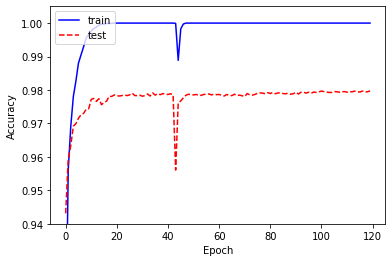

313/313 [==============================] - 1s 2ms/step - loss: 0.1186 - accuracy: 0.9807
train accuracy :  0.9949333071708679 train loss :  0.0372379831969738
test accuracy :  0.9807000160217285  test loss :  0.11860010027885437


In [13]:
#은닉층 1개 & epochs = 120
model1_2 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation= 'relu'),
                            Dense(10, activation= 'softmax')
                            ])

model1_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#신경망 학습2
hist1_2 = model1_2.fit(train_x, train_y, epochs = 120, batch_size = 256, validation_split = 0.25)

plt.plot(hist1_2.history['accuracy'], 'b-')
plt.plot(hist1_2.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train1_2 = model1_2.evaluate(train_x, train_y)
sc_test1_2 = model1_2.evaluate(test_x, test_y)
print("train accuracy : ", sc_train1_2[1], "train loss : ", sc_train1_2[0])
print("test accuracy : ", sc_test1_2[1], " test loss : ", sc_test1_2[0])

Epoch 1/500
176/176 [==============================] - 1s 5ms/step - loss: 0.3765 - accuracy: 0.8977 - val_loss: 0.1984 - val_accuracy: 0.9441
Epoch 2/500
176/176 [==============================] - 1s 4ms/step - loss: 0.1608 - accuracy: 0.9550 - val_loss: 0.1472 - val_accuracy: 0.9566
Epoch 3/500
176/176 [==============================] - 1s 4ms/step - loss: 0.1086 - accuracy: 0.9698 - val_loss: 0.1146 - val_accuracy: 0.9660
Epoch 4/500
176/176 [==============================] - 1s 4ms/step - loss: 0.0793 - accuracy: 0.9777 - val_loss: 0.1051 - val_accuracy: 0.9686
Epoch 5/500
176/176 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9836 - val_loss: 0.0976 - val_accuracy: 0.9709
Epoch 6/500
176/176 [==============================] - 1s 4ms/step - loss: 0.0472 - accuracy: 0.9871 - val_loss: 0.0872 - val_accuracy: 0.9743
Epoch 7/500
176/176 [==============================] - 1s 4ms/step - loss: 0.0382 - accuracy: 0.9900 - val_loss: 0.0870 - val_accuracy: 0.9735

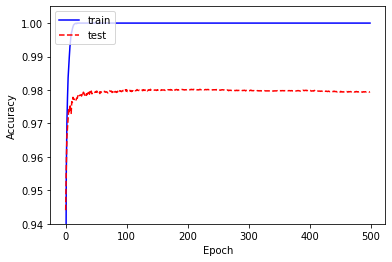

313/313 [==============================] - 1s 3ms/step - loss: 0.1595 - accuracy: 0.9816
train accuracy :  0.994866669178009 train loss :  0.05115368217229843
test accuracy :  0.9815999865531921  test loss :  0.15946437418460846


In [14]:
#신경망 학습3
model1_3 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation= 'relu'),
                            Dense(10, activation= 'softmax')
                            ])

model1_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist1_3 = model1_3.fit(train_x, train_y, epochs = 500, batch_size = 256, validation_split = 0.25)

#학습 그래프3
plt.plot(hist1_3.history['accuracy'], 'b-')
plt.plot(hist1_3.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train1_3 = model1_3.evaluate(train_x, train_y)
sc_test1_3 = model1_3.evaluate(test_x, test_y)
print("train accuracy : ", sc_train1_3[1], "train loss : ", sc_train1_3[0])
print("test accuracy : ", sc_test1_3[1], " test loss : ", sc_test1_3[0])

Epoch 1/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.3709 - accuracy: 0.8987 - val_loss: 0.1955 - val_accuracy: 0.9449
Epoch 2/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.1603 - accuracy: 0.9545 - val_loss: 0.1509 - val_accuracy: 0.9559
Epoch 3/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.1092 - accuracy: 0.9695 - val_loss: 0.1194 - val_accuracy: 0.9661
Epoch 4/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9766 - val_loss: 0.1110 - val_accuracy: 0.9681
Epoch 5/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.0624 - accuracy: 0.9831 - val_loss: 0.1008 - val_accuracy: 0.9691
Epoch 6/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9870 - val_loss: 0.0936 - val_accuracy: 0.9727
Epoch 7/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.0385 - accuracy: 0.9899 - val_loss: 0.0921 - val_accuracy:

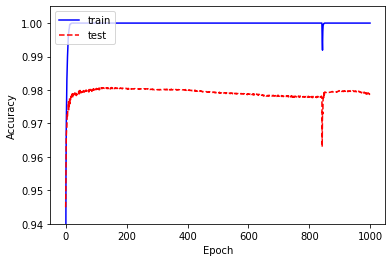

313/313 [==============================] - 1s 3ms/step - loss: 0.1914 - accuracy: 0.9814
train accuracy :  0.9947333335876465 train loss :  0.06144125014543533
test accuracy :  0.9814000129699707  test loss :  0.19138523936271667


In [15]:
#신경망 학습4
model1_4 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation= 'relu'),
                            Dense(10, activation= 'softmax')
                            ])

model1_4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist1_4 = model1_4.fit(train_x, train_y, epochs = 1000, batch_size = 256, validation_split = 0.25)

#학습 그래프4
plt.plot(hist1_4.history['accuracy'], 'b-')
plt.plot(hist1_4.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train1_4 = model1_4.evaluate(train_x, train_y)
sc_test1_4 = model1_4.evaluate(test_x, test_y)
print("train accuracy : ", sc_train1_4[1], "train loss : ", sc_train1_4[0])
print("test accuracy : ", sc_test1_4[1], " test loss : ", sc_test1_4[0])

# 은닉층 2개(512/512) & epochs = 120 / 500 / 1000

Epoch 1/120
176/176 [==============================] - 2s 7ms/step - loss: 0.2972 - accuracy: 0.9144 - val_loss: 0.1646 - val_accuracy: 0.9513
Epoch 2/120
176/176 [==============================] - 1s 5ms/step - loss: 0.1050 - accuracy: 0.9685 - val_loss: 0.1087 - val_accuracy: 0.9677
Epoch 3/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.1035 - val_accuracy: 0.9678
Epoch 4/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0903 - val_accuracy: 0.9729
Epoch 5/120
176/176 [==============================] - 1s 6ms/step - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.0877 - val_accuracy: 0.9747
Epoch 6/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0895 - val_accuracy: 0.9757
Epoch 7/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.1048 - val_accuracy: 0.9742

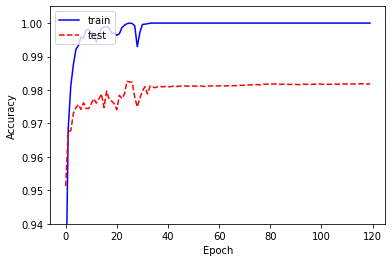

313/313 [==============================] - 1s 3ms/step - loss: 0.1451 - accuracy: 0.9842
train accuracy :  0.9954833388328552 train loss :  0.04640447348356247
test accuracy :  0.9842000007629395  test loss :  0.14507167041301727


In [16]:
#신경망 학습2_1_2
model2_1_2 = models.Sequential([
                               Flatten(input_shape = (28, 28)),
                               Dense(512, activation= 'relu'),
                               Dense(512, activation= 'relu'),
                               Dense(10, activation= 'softmax')
                               ])

model2_1_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist2_1_2 = model2_1_2.fit(train_x, train_y, epochs = 120, batch_size = 256, validation_split = 0.25)

#학습 그래프4
plt.plot(hist2_1_2.history['accuracy'], 'b-')
plt.plot(hist2_1_2.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_1_2 = model2_1_2.evaluate(train_x, train_y)
sc_test2_1_2 = model2_1_2.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_1_2[1], "train loss : ", sc_train2_1_2[0])
print("test accuracy : ", sc_test2_1_2[1], " test loss : ", sc_test2_1_2[0])

Epoch 1/500
176/176 [==============================] - 2s 7ms/step - loss: 0.3107 - accuracy: 0.9103 - val_loss: 0.1500 - val_accuracy: 0.9563
Epoch 2/500
176/176 [==============================] - 1s 5ms/step - loss: 0.1047 - accuracy: 0.9681 - val_loss: 0.1067 - val_accuracy: 0.9681
Epoch 3/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0931 - val_accuracy: 0.9723
Epoch 4/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0969 - val_accuracy: 0.9711
Epoch 5/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0842 - val_accuracy: 0.9752
Epoch 6/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 7/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0972 - val_accuracy: 0.9739

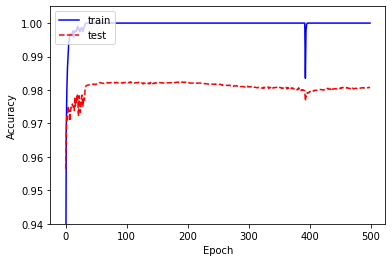

313/313 [==============================] - 1s 3ms/step - loss: 0.1875 - accuracy: 0.9835
train accuracy :  0.995199978351593 train loss :  0.057611025869846344
test accuracy :  0.9835000038146973  test loss :  0.187482550740242


In [17]:
#신경망 학습2_1_3
model2_1_3 = models.Sequential([
                               Flatten(input_shape = (28, 28)),
                               Dense(512, activation= 'relu'),
                               Dense(512, activation= 'relu'),
                               Dense(10, activation= 'softmax')
                               ])

model2_1_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist2_1_3 = model2_1_3.fit(train_x, train_y, epochs = 500, batch_size = 256, validation_split = 0.25)

#학습 그래프4
plt.plot(hist2_1_3.history['accuracy'], 'b-')
plt.plot(hist2_1_3.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_1_3 = model2_1_3.evaluate(train_x, train_y)
sc_test2_1_3 = model2_1_3.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_1_3[1], "train loss : ", sc_train2_1_3[0])
print("test accuracy : ", sc_test2_1_3[1], " test loss : ", sc_test2_1_3[0])

Epoch 1/1000
176/176 [==============================] - 2s 7ms/step - loss: 0.3058 - accuracy: 0.9132 - val_loss: 0.1477 - val_accuracy: 0.9569
Epoch 2/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.1050 - accuracy: 0.9688 - val_loss: 0.1042 - val_accuracy: 0.9693
Epoch 3/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0917 - val_accuracy: 0.9721
Epoch 4/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0966 - val_accuracy: 0.9705
Epoch 5/1000
176/176 [==============================] - 1s 6ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.1008 - val_accuracy: 0.9696
Epoch 6/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.1017 - val_accuracy: 0.9722
Epoch 7/1000
176/176 [==============================] - 1s 6ms/step - loss: 0.0134 - accuracy: 0.9963 - val_loss: 0.0937 - val_accuracy:

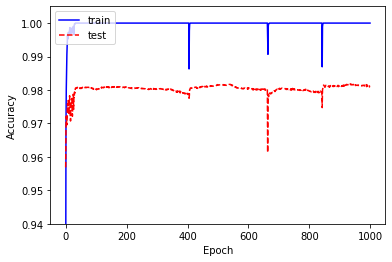

313/313 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.9822
train accuracy :  0.9952499866485596 train loss :  0.08460886776447296
test accuracy :  0.982200026512146  test loss :  0.2703184485435486


In [18]:
#신경망 학습2_1_4
model2_1_4 = models.Sequential([
                               Flatten(input_shape = (28, 28)),
                               Dense(512, activation= 'relu'),
                               Dense(512, activation= 'relu'),
                               Dense(10, activation= 'softmax')
                               ])

model2_1_4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist2_1_4 = model2_1_4.fit(train_x, train_y, epochs = 1000, batch_size = 256, validation_split = 0.25)

#학습 그래프4
plt.plot(hist2_1_4.history['accuracy'], 'b-')
plt.plot(hist2_1_4.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_1_4 = model2_1_4.evaluate(train_x, train_y)
sc_test2_1_4 = model2_1_4.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_1_4[1], "train loss : ", sc_train2_1_4[0])
print("test accuracy : ", sc_test2_1_4[1], " test loss : ", sc_test2_1_4[0])

# 은닉층 2개(512/256) & epochs = 120 / 500 / 1000

Epoch 1/120
176/176 [==============================] - 1s 6ms/step - loss: 0.3250 - accuracy: 0.9074 - val_loss: 0.1575 - val_accuracy: 0.9529
Epoch 2/120
176/176 [==============================] - 1s 5ms/step - loss: 0.1176 - accuracy: 0.9646 - val_loss: 0.1223 - val_accuracy: 0.9627
Epoch 3/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0723 - accuracy: 0.9782 - val_loss: 0.1054 - val_accuracy: 0.9685
Epoch 4/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.1086 - val_accuracy: 0.9680
Epoch 5/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0871 - val_accuracy: 0.9751
Epoch 6/120
176/176 [==============================] - 1s 6ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0870 - val_accuracy: 0.9757
Epoch 7/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.0876 - val_accuracy: 0.9770

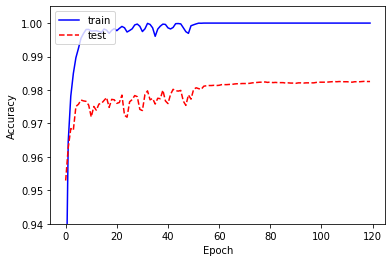

313/313 [==============================] - 1s 3ms/step - loss: 0.1393 - accuracy: 0.9841
train accuracy :  0.9956333041191101 train loss :  0.047478754073381424
test accuracy :  0.9840999841690063  test loss :  0.13929954171180725


In [19]:
#신경망 학습2_2_2
model2_2_2 = models.Sequential([
                               Flatten(input_shape = (28, 28)),
                               Dense(512, activation= 'relu'),
                               Dense(256, activation= 'relu'),
                               Dense(10, activation= 'softmax')
                               ])

model2_2_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist2_2_2 = model2_2_2.fit(train_x, train_y, epochs = 120, batch_size = 256, validation_split = 0.25)

#학습 그래프4
plt.plot(hist2_2_2.history['accuracy'], 'b-')
plt.plot(hist2_2_2.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_2_2 = model2_2_2.evaluate(train_x, train_y)
sc_test2_2_2 = model2_2_2.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_2_2[1], "train loss : ", sc_train2_2_2[0])
print("test accuracy : ", sc_test2_2_2[1], " test loss : ", sc_test2_2_2[0])

Epoch 1/500
176/176 [==============================] - 2s 7ms/step - loss: 0.3199 - accuracy: 0.9092 - val_loss: 0.1670 - val_accuracy: 0.9485
Epoch 2/500
176/176 [==============================] - 1s 5ms/step - loss: 0.1149 - accuracy: 0.9659 - val_loss: 0.1148 - val_accuracy: 0.9655
Epoch 3/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.9790 - val_loss: 0.0997 - val_accuracy: 0.9705
Epoch 4/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0883 - val_accuracy: 0.9747
Epoch 5/500
176/176 [==============================] - 1s 6ms/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0860 - val_accuracy: 0.9752
Epoch 6/500
176/176 [==============================] - 1s 6ms/step - loss: 0.0244 - accuracy: 0.9928 - val_loss: 0.0910 - val_accuracy: 0.9746
Epoch 7/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.0970 - val_accuracy: 0.9739

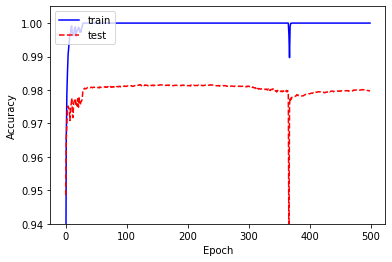

313/313 [==============================] - 1s 3ms/step - loss: 0.1941 - accuracy: 0.9825
train accuracy :  0.9949166774749756 train loss :  0.06766366213560104
test accuracy :  0.9825000166893005  test loss :  0.19414091110229492


In [20]:
#신경망 학습2_2_3
model2_2_3 = models.Sequential([
                               Flatten(input_shape = (28, 28)),
                               Dense(512, activation= 'relu'),
                               Dense(256, activation= 'relu'),
                               Dense(10, activation= 'softmax')
                               ])

model2_2_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist2_2_3 = model2_2_3.fit(train_x, train_y, epochs = 500, batch_size = 256, validation_split = 0.25)

#학습 그래프4
plt.plot(hist2_2_3.history['accuracy'], 'b-')
plt.plot(hist2_2_3.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_2_3 = model2_2_3.evaluate(train_x, train_y)
sc_test2_2_3 = model2_2_3.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_2_3[1], "train loss : ", sc_train2_2_3[0])
print("test accuracy : ", sc_test2_2_3[1], " test loss : ", sc_test2_2_3[0])

Epoch 1/1000
176/176 [==============================] - 1s 6ms/step - loss: 0.3189 - accuracy: 0.9102 - val_loss: 0.1624 - val_accuracy: 0.9516
Epoch 2/1000
176/176 [==============================] - 1s 6ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1126 - val_accuracy: 0.9668
Epoch 3/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0997 - val_accuracy: 0.9689
Epoch 4/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0894 - val_accuracy: 0.9727
Epoch 5/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0881 - val_accuracy: 0.9751
Epoch 6/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.0859 - val_accuracy: 0.9765
Epoch 7/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 0.0905 - val_accuracy:

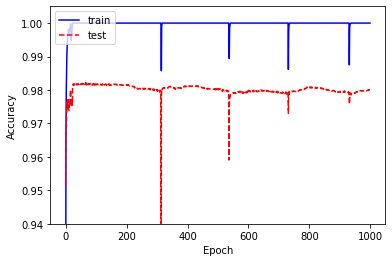

313/313 [==============================] - 1s 3ms/step - loss: 0.2010 - accuracy: 0.9818
train accuracy :  0.9950166940689087 train loss :  0.05969356372952461
test accuracy :  0.9818000197410583  test loss :  0.20098258554935455


In [24]:
#신경망 학습2_2_3
model2_2_4 = models.Sequential([
                               Flatten(input_shape = (28, 28)),
                               Dense(512, activation= 'relu'),
                               Dense(256, activation= 'relu'),
                               Dense(10, activation= 'softmax')
                               ])

model2_2_4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist2_2_4 = model2_2_4.fit(train_x, train_y, epochs = 1000, batch_size = 256, validation_split = 0.25)

#학습 그래프4
plt.plot(hist2_2_4.history['accuracy'], 'b-')
plt.plot(hist2_2_4.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train2_2_4 = model2_2_4.evaluate(train_x, train_y)
sc_test2_2_4 = model2_2_4.evaluate(test_x, test_y)
print("train accuracy : ", sc_train2_2_4[1], "train loss : ", sc_train2_2_4[0])
print("test accuracy : ", sc_test2_2_4[1], " test loss : ", sc_test2_2_4[0])

In [25]:
#정리
print("=========== [은닉층 1개] ===========")
print("=========== epochs = 12 ===========")
print("train accuracy : ", sc_train1_1[1], "train loss : ", sc_train1_1[0])
print("test accuracy : ", sc_test1_1[1], " test loss : ", sc_test1_1[0])
print("/n")

print("=========== epochs = 120 ===========")
print("train accuracy : ", sc_train1_2[1], "train loss : ", sc_train1_2[0])
print("test accuracy : ", sc_test1_2[1], " test loss : ", sc_test1_2[0])
print("/n")

print("=========== epochs = 500 ===========")
print("train accuracy : ", sc_train1_3[1], "train loss : ", sc_train1_3[0])
print("test accuracy : ", sc_test1_3[1], " test loss : ", sc_test1_3[0])
print("/n")

print("=========== epochs = 1000 ===========")
print("train accuracy : ", sc_train1_4[1], "train loss : ", sc_train1_4[0])
print("test accuracy : ", sc_test1_4[1], " test loss : ", sc_test1_4[0])
print("/n")

print("=========== [은닉층 2개 & 뉴런의 수 512/512] ===========")
print("=========== epochs = 12 ===========")
print("train accuracy : ", sc_train2_1[1], "train loss : ", sc_train2_1[0])
print("test accuracy : ", sc_test2_1[1], " test loss : ", sc_test2_1[0])
print("/n")

print("=========== epochs = 120 ===========")
print("train accuracy : ", sc_train2_1_2[1], "train loss : ", sc_train2_1_2[0])
print("test accuracy : ", sc_test2_1_2[1], " test loss : ", sc_test2_1_2[0])
print("/n")

print("=========== epochs = 500 ===========")
print("train accuracy : ", sc_train2_1_3[1], "train loss : ", sc_train2_1_3[0])
print("test accuracy : ", sc_test2_1_3[1], " test loss : ", sc_test2_1_3[0])
print("/n")

print("=========== epochs = 1000 ===========")
print("train accuracy : ", sc_train2_1_4[1], "train loss : ", sc_train2_1_4[0])
print("test accuracy : ", sc_test2_1_4[1], " test loss : ", sc_test2_1_4[0])

print("=========== [은닉층 2개 & 뉴런의 수 512/256] ===========")
print("=========== epochs = 12 ===========")
print("train accuracy : ", sc_train2_2[1], "train loss : ", sc_train2_2[0])
print("test accuracy : ", sc_test2_2[1], " test loss : ", sc_test2_2[0])
print("/n")

print("=========== epochs = 120 ===========")
print("train accuracy : ", sc_train2_2_2[1], "train loss : ", sc_train2_2_2[0])
print("test accuracy : ", sc_test2_2_2[1], " test loss : ", sc_test2_2_2[0])
print("/n")

print("=========== epochs = 500 ===========")
print("train accuracy : ", sc_train2_2_3[1], "train loss : ", sc_train2_2_3[0])
print("test accuracy : ", sc_test2_2_3[1], " test loss : ", sc_test2_2_3[0])
print("/n")

print("=========== epochs = 1000 ===========")
print("train accuracy : ", sc_train2_2_4[1], "train loss : ", sc_train2_2_4[0])
print("test accuracy : ", sc_test2_2_4[1], " test loss : ", sc_test2_2_4[0])

=========== [은닉층 1개] ===========
=========== epochs = 12 ===========
train accuracy :  0.9937999844551086 train loss :  0.02729642763733864
test accuracy :  0.9811999797821045  test loss :  0.06480918824672699
/n
=========== epochs = 120 ===========
train accuracy :  0.9949333071708679 train loss :  0.0372379831969738
test accuracy :  0.9807000160217285  test loss :  0.11860010027885437
/n
=========== epochs = 500 ===========
train accuracy :  0.994866669178009 train loss :  0.05115368217229843
test accuracy :  0.9815999865531921  test loss :  0.15946437418460846
/n
=========== epochs = 1000 ===========
train accuracy :  0.9947333335876465 train loss :  0.06144125014543533
test accuracy :  0.9814000129699707  test loss :  0.19138523936271667
/n
=========== [은닉층 2개 & 뉴런의 수 512/512] ===========
=========== epochs = 12 ===========
train accuracy :  0.9912999868392944 train loss :  0.034651078283786774
test accuracy :  0.9800999760627747  test loss :  0.08432424813508987
/n
=========== epo

epochs를 늘렸을 때 시험 데이저의 정확도는 늘어나지만 98.3% 이상을 넘기지 못하는 결과를 보여주고 있다.

가장 좋은 정확도를 보여주고 있는 모델은 은닉층이 2개(512/512) 이고 epochs = 120일때 test accuracy는  98.42%이고, train accuracy는 99.55%으로 나타났다,

은닉층2개인 모델에서 정확도를 빠르게 올리기 위해 
초기값을 히 초깃값으로 하여 epochs를 12, 120, 500, 1000으로 학습해 보았다

# 은닉층 2개(512/512) &  히 초깃값 (epochs = 12 / 120 / 500 / 1000)

In [26]:
# Usage in a Keras layer:
initializer = tf.keras.initializers.HeNormal()

Epoch 1/12
176/176 [==============================] - 2s 7ms/step - loss: 0.2900 - accuracy: 0.9167 - val_loss: 0.1483 - val_accuracy: 0.9556
Epoch 2/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0977 - accuracy: 0.9714 - val_loss: 0.1199 - val_accuracy: 0.9632
Epoch 3/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0598 - accuracy: 0.9822 - val_loss: 0.0940 - val_accuracy: 0.9721
Epoch 4/12
176/176 [==============================] - 1s 6ms/step - loss: 0.0401 - accuracy: 0.9880 - val_loss: 0.0918 - val_accuracy: 0.9716
Epoch 5/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0846 - val_accuracy: 0.9755
Epoch 6/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 0.0975 - val_accuracy: 0.9737
Epoch 7/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0992 - val_accuracy: 0.9745
Epoch 

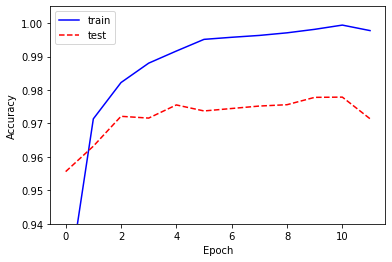

313/313 [==============================] - 1s 3ms/step - loss: 0.1022 - accuracy: 0.9730
train accuracy :  0.9879666566848755 train loss :  0.04692676663398743
test accuracy :  0.9729999899864197  test loss :  0.10215163230895996


In [27]:
#신경망 학습3
model3_1 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(10, activation= 'softmax', kernel_initializer=initializer)
                            ])

model3_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist3_1 = model3_1.fit(train_x, train_y, epochs = 12, batch_size = 256, validation_split = 0.25)

#학습 그래프3
plt.plot(hist3_1.history['accuracy'], 'b-')
plt.plot(hist3_1.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train3_1 = model3_1.evaluate(train_x, train_y)
sc_test3_1 = model3_1.evaluate(test_x, test_y)
print("train accuracy : ", sc_train3_1[1], "train loss : ", sc_train3_1[0])
print("test accuracy : ", sc_test3_1[1], " test loss : ", sc_test3_1[0])

Epoch 1/120
176/176 [==============================] - 2s 7ms/step - loss: 0.2897 - accuracy: 0.9154 - val_loss: 0.1414 - val_accuracy: 0.9599
Epoch 2/120
176/176 [==============================] - 1s 5ms/step - loss: 0.1012 - accuracy: 0.9706 - val_loss: 0.1025 - val_accuracy: 0.9696
Epoch 3/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0624 - accuracy: 0.9817 - val_loss: 0.0888 - val_accuracy: 0.9743
Epoch 4/120
176/176 [==============================] - 1s 6ms/step - loss: 0.0414 - accuracy: 0.9878 - val_loss: 0.0902 - val_accuracy: 0.9741
Epoch 5/120
176/176 [==============================] - 1s 6ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0890 - val_accuracy: 0.9753
Epoch 6/120
176/176 [==============================] - 1s 5ms/step - loss: 0.0194 - accuracy: 0.9945 - val_loss: 0.0893 - val_accuracy: 0.9762
Epoch 7/120
176/176 [==============================] - 1s 6ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0891 - val_accuracy: 0.9769

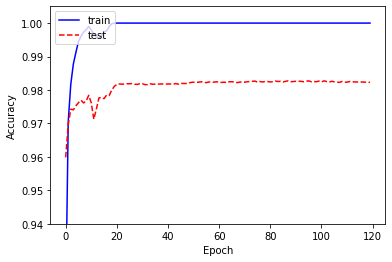

313/313 [==============================] - 1s 3ms/step - loss: 0.1443 - accuracy: 0.9831
train accuracy :  0.9955666661262512 train loss :  0.04253648966550827
test accuracy :  0.9830999970436096  test loss :  0.14426426589488983


In [28]:
#은닉층 1개 & epochs = 120
model3_2 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(10, activation= 'softmax', kernel_initializer=initializer)
                            ])

model3_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#신경망 학습2
hist3_2 = model3_2.fit(train_x, train_y, epochs = 120, batch_size = 256, validation_split = 0.25)

plt.plot(hist3_2.history['accuracy'], 'b-')
plt.plot(hist3_2.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train3_2 = model3_2.evaluate(train_x, train_y)
sc_test3_2 = model3_2.evaluate(test_x, test_y)
print("train accuracy : ", sc_train3_2[1], "train loss : ", sc_train3_2[0])
print("test accuracy : ", sc_test3_2[1], " test loss : ", sc_test3_2[0])

Epoch 1/500
176/176 [==============================] - 2s 7ms/step - loss: 0.2978 - accuracy: 0.9126 - val_loss: 0.1522 - val_accuracy: 0.9542
Epoch 2/500
176/176 [==============================] - 1s 6ms/step - loss: 0.1009 - accuracy: 0.9700 - val_loss: 0.1039 - val_accuracy: 0.9691
Epoch 3/500
176/176 [==============================] - 1s 6ms/step - loss: 0.0617 - accuracy: 0.9814 - val_loss: 0.0926 - val_accuracy: 0.9717
Epoch 4/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0917 - val_accuracy: 0.9727
Epoch 5/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.0883 - val_accuracy: 0.9761
Epoch 6/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0896 - val_accuracy: 0.9766
Epoch 7/500
176/176 [==============================] - 1s 5ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0888 - val_accuracy: 0.9769

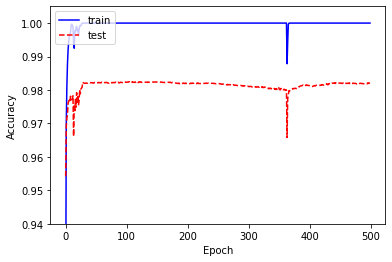

313/313 [==============================] - 1s 3ms/step - loss: 0.1665 - accuracy: 0.9835
train accuracy :  0.9955000281333923 train loss :  0.05757958069443703
test accuracy :  0.9835000038146973  test loss :  0.16651412844657898


In [29]:
#은닉층 1개 & epochs = 500
model3_3 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(10, activation= 'softmax', kernel_initializer=initializer)
                            ])

model3_3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#신경망 학습 3_3
hist3_3 = model3_3.fit(train_x, train_y, epochs = 500, batch_size = 256, validation_split = 0.25)

plt.plot(hist3_3.history['accuracy'], 'b-')
plt.plot(hist3_3.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train3_3 = model3_3.evaluate(train_x, train_y)
sc_test3_3 = model3_3.evaluate(test_x, test_y)
print("train accuracy : ", sc_train3_3[1], "train loss : ", sc_train3_3[0])
print("test accuracy : ", sc_test3_3[1], " test loss : ", sc_test3_3[0])

Epoch 1/1000
176/176 [==============================] - 2s 7ms/step - loss: 0.2948 - accuracy: 0.9136 - val_loss: 0.1487 - val_accuracy: 0.9570
Epoch 2/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.1024 - accuracy: 0.9701 - val_loss: 0.1148 - val_accuracy: 0.9650
Epoch 3/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0631 - accuracy: 0.9811 - val_loss: 0.1012 - val_accuracy: 0.9686
Epoch 4/1000
176/176 [==============================] - 1s 6ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0899 - val_accuracy: 0.9741
Epoch 5/1000
176/176 [==============================] - 1s 5ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0951 - val_accuracy: 0.9734
Epoch 6/1000
176/176 [==============================] - 1s 6ms/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.0963 - val_accuracy: 0.9743
Epoch 7/1000
176/176 [==============================] - 1s 6ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0988 - val_accuracy:

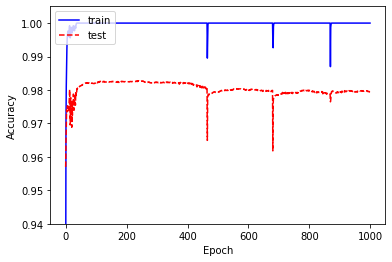

313/313 [==============================] - 1s 3ms/step - loss: 0.2349 - accuracy: 0.9826
train accuracy :  0.9948499798774719 train loss :  0.08750451356172562
test accuracy :  0.9825999736785889  test loss :  0.23493239283561707


In [30]:
#은닉층 1개 & epochs = 1000
model3_4 = models.Sequential([
                            Flatten(input_shape = (28, 28)),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(512, activation= 'relu', kernel_initializer=initializer),
                            Dense(10, activation= 'softmax', kernel_initializer=initializer)
                            ])

model3_4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#신경망 학습 3_4
hist3_4 = model3_4.fit(train_x, train_y, epochs = 1000, batch_size = 256, validation_split = 0.25)

plt.plot(hist3_4.history['accuracy'], 'b-')
plt.plot(hist3_4.history['val_accuracy'], 'r--')
plt.legend(['train', 'test'], loc = 'upper left')
plt.ylim([0.94, 1.005])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

sc_train3_4 = model3_4.evaluate(train_x, train_y)
sc_test3_4 = model3_4.evaluate(test_x, test_y)
print("train accuracy : ", sc_train3_4[1], "train loss : ", sc_train3_4[0])
print("test accuracy : ", sc_test3_4[1], " test loss : ", sc_test3_4[0])

In [32]:
#정리
print("=========== total evaluatation ===========")
print("")

print("########### initializer option = default ###########")
print("")

print("=========== [은닉층 2개] ===========")
print("=========== epochs = 12 ===========")
print("train accuracy : ", sc_train2_1[1], "train loss : ", sc_train2_1[0])
print("test accuracy : ", sc_test2_1[1], " test loss : ", sc_test2_1[0])
print("")

print("=========== epochs = 120 ===========")
print("train accuracy : ", sc_train2_1_2[1], "train loss : ", sc_train2_1_2[0])
print("test accuracy : ", sc_test2_1_2[1], " test loss : ", sc_test2_1_2[0])
print("")

print("=========== epochs = 500 ===========")
print("train accuracy : ", sc_train2_1_3[1], "train loss : ", sc_train2_1_3[0])
print("test accuracy : ", sc_test2_1_3[1], " test loss : ", sc_test2_1_3[0])
print("")

print("=========== epochs = 1000 ===========")
print("train accuracy : ", sc_train2_1_4[1], "train loss : ", sc_train2_1_4[0])
print("test accuracy : ", sc_test2_1_4[1], " test loss : ", sc_test2_1_4[0])
print("")

print("########### initializer option = HeNormal() ###########")
print("")

print("=========== [은닉층 2개 & 512/512]==+=========")
print("=========== epochs = 12 ===========")
print("train accuracy : ", sc_train3_1[1], "train loss : ", sc_train3_1[0])
print("test accuracy : ", sc_test3_1[1], " test loss : ", sc_test3_1[0])
print("")

print("=========== epochs = 120 ===========")
print("train accuracy : ", sc_train3_2[1], "train loss : ", sc_train3_2[0])
print("test accuracy : ", sc_test3_2[1], " test loss : ", sc_test3_2[0])
print("")

print("=========== epochs = 500 ===========")
print("train accuracy : ", sc_train3_3[1], "train loss : ", sc_train3_3[0])
print("test accuracy : ", sc_test3_3[1], " test loss : ", sc_test3_3[0])
print("")

print("=========== epochs = 1000 ===========")
print("train accuracy : ", sc_train3_4[1], "train loss : ", sc_train3_4[0])
print("test accuracy : ", sc_test3_4[1], " test loss : ", sc_test3_4[0])
print("")

=========== total evaluatation ===========

########### initializer option = default ###########

=========== [은닉층 2개] ===========
=========== epochs = 12 ===========
train accuracy :  0.9912999868392944 train loss :  0.034651078283786774
test accuracy :  0.9800999760627747  test loss :  0.08432424813508987

=========== epochs = 120 ===========
train accuracy :  0.9954833388328552 train loss :  0.04640447348356247
test accuracy :  0.9842000007629395  test loss :  0.14507167041301727

=========== epochs = 500 ===========
train accuracy :  0.995199978351593 train loss :  0.057611025869846344
test accuracy :  0.9835000038146973  test loss :  0.187482550740242

=========== epochs = 1000 ===========
train accuracy :  0.9952499866485596 train loss :  0.08460886776447296
test accuracy :  0.982200026512146  test loss :  0.2703184485435486

########### initializer option = HeNormal() ###########

=========== [은닉층 2개 & 512/512]==+=========
=========== epochs = 12 ===========
train accuracy :  0.

test 정확도로 봤을 때 은닉층2개(512/512)이고, epochs = 120일때 98.30으로 결과가 가장 좋고, train 정확도도 98.8%로 높은 것을 알 수 있다.